In [29]:
# 1단계: 필요한 라이브러리 불러오기
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandas 출력 설정 (데이터를 더 예쁘게 보여주기)
# Configure pandas display settings for better output
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시 / Show all columns
pd.set_option('display.width', None)  # 너비 제한 없음 / No width limit
pd.set_option('display.max_colwidth', 50)  # 컬럼 내용 최대 50자 / Max column width 50 chars

In [30]:
# 2단계: CSV 파일 읽어오기
# Step 2: Read CSV file
data = pd.read_csv('DATA GAME - omok.csv')

# 데이터가 어떻게 생겼는지 먼저 확인
# Check how the data looks
print("📊 Data Preview:")
print(f"Total number of data: {len(data)} rows\n")
display(data.head(10))  # 첫 10개 행을 표 형태로 예쁘게 표시 / Display first 10 rows in table format

print("\n📋 Data Information:")
print(f"Number of columns: {len(data.columns)}")
print(f"Column names: {data.columns.tolist()}")

📊 Data Preview:
Total number of data: 19 rows



,타임스탬프,"Enter your nickname\nTo avoid duplicate nicknames,\nplease add your birth month and day (MMDD) after your nickname.\n\n\n닉네임을 입력해 주세요\n\n중복을 피하기 위해,\n닉네임 뒤에 본인의 생월·일(MMDD) 을 붙여 주세요.\n\nExample:\nPimsFan_0321",Choose the column (alphabet) \n둘 위치의 열(알파벳)을 선택해 주세요,Choose the row (number)\n둘 위치의 행(숫자)을 선택해 주세요
0,2025. 11. 28 오후 8:16:49,CZ_1103,A,1
1,2025. 11. 28 오후 8:16:50,lch_0317_0317,F,2
2,2025. 12. 14 오후 4:14:13,Qq,A,2
3,2025. 12. 14 오후 4:14:26,Rr,B,5
4,2025. 12. 14 오후 4:14:37,Ww,A,1
5,2025. 12. 14 오후 4:14:51,Th,A,1
6,2025. 12. 14 오후 4:15:00,Rf,A,1
7,2025. 12. 14 오후 4:15:09,Uu,E,3
8,2025. 12. 14 오후 4:15:22,Uui,G,5
9,2025. 12. 14 오후 4:15:36,Qqe,H,5



📋 Data Information:
Number of columns: 4
Column names: ['타임스탬프', 'Enter your nickname\nTo avoid duplicate nicknames,\nplease add your birth month and day (MMDD) after your nickname.\n\n\n닉네임을 입력해 주세요\n\n중복을 피하기 위해,\n닉네임 뒤에 본인의 생월·일(MMDD) 을 붙여 주세요.\n\nExample:\nPimsFan_0321', 'Choose the column (alphabet) \n둘 위치의 열(알파벳)을 선택해 주세요  ', 'Choose the row (number)\n둘 위치의 행(숫자)을 선택해 주세요']


In [31]:
# 3단계: 컬럼 이름을 간단하게 변경 (작업하기 쉽게)
# Step 3: Rename columns to simpler names for easier work
data.columns = ['타임스탬프', '닉네임', '열', '행']

# 행과 열을 합쳐서 위치 정보 만들기 (예: A + 1 = A1)
# Combine column and row to create position info (e.g., A + 1 = A1)
data['위치'] = data['열'] + data['행'].astype(str)

print("✅ Data with Position Information Added:")

display(data[['닉네임', '열', '행', '위치']].head(10))

✅ Data with Position Information Added:


,닉네임,열,행,위치
0,CZ_1103,A,1,A1
1,lch_0317_0317,F,2,F2
2,Qq,A,2,A2
3,Rr,B,5,B5
4,Ww,A,1,A1
5,Th,A,1,A1
6,Rf,A,1,A1
7,Uu,E,3,E3
8,Uui,G,5,G5
9,Qqe,H,5,H5


In [32]:
# 4단계: 각 위치에 몇 표씩 받았는지 계산하기
# Step 4: Calculate how many votes each position received
vote_counts = data['위치'].value_counts()  # 빈도수 계산 (이미 많은 순서대로 정렬됨) / Calculate frequency (already sorted by count)

# 전체 투표 수
# Total number of votes
total_votes = len(data)

# 퍼센트 계산
# Calculate percentage
vote_percent = (vote_counts / total_votes * 100).round(2)

# 결과를 데이터프레임으로 만들기
# Create result as a DataFrame
result = pd.DataFrame({
    'Position': vote_counts.index,
    'Vote Count': vote_counts.values,
    'Percentage (%)': vote_percent.values
})

print(f"📈 Total Votes: {total_votes} votes\n")
print("=" * 50)
print("🎯 Vote Results by Position (Sorted by Frequency):")
print("=" * 50)
display(result)  # 표 형태로 깔끔하게 표시 / Display in clean table format


📈 Total Votes: 19 votes

🎯 Vote Results by Position (Sorted by Frequency):


,Position,Vote Count,Percentage (%)
0,D4,7,36.84
1,A1,4,21.05
2,H5,3,15.79
3,F2,1,5.26
4,B5,1,5.26
5,A2,1,5.26
6,G5,1,5.26
7,E3,1,5.26


In [33]:
# 5단계: 상위 5개 위치만 강조해서 보기
# Step 5: Highlight and display top 5 positions
print("\n" + "=" * 40)
print("TOP 5 Most Popular Positions:")
print("=" * 40)
for idx, row in result.head(5).iterrows():
    print(f"Rank {idx+1}: {row['Position']} - {row['Vote Count']} votes ({row['Percentage (%)']}%)")



TOP 5 Most Popular Positions:
Rank 1: D4 - 7 votes (36.84%)
Rank 2: A1 - 4 votes (21.05%)
Rank 3: H5 - 3 votes (15.79%)
Rank 4: F2 - 1 votes (5.26%)
Rank 5: B5 - 1 votes (5.26%)


/tmp/ipykernel_8797/2001197429.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


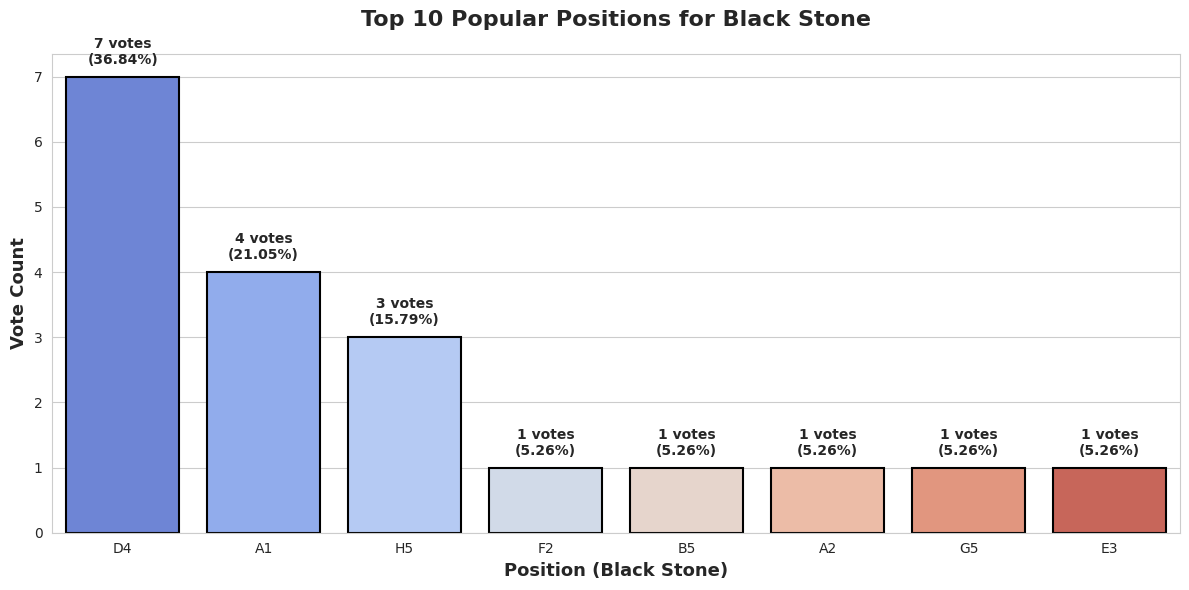


📚 Libraries Used:
- pandas: Read data, analyze, and display in table format
- seaborn: Statistical graph visualization (prettier charts)
- matplotlib: Basic graph plotting


In [27]:
# 6단계: 시각화 - seaborn으로 더 예쁜 막대 그래프 만들기
# Step 6: Visualization - Create prettier bar chart with seaborn

# seaborn 스타일 설정 (그래프를 더 예쁘게)
# Set seaborn style (make graph prettier)
sns.set_style('whitegrid')
sns.set_palette('husl')

# 상위 10개 위치만 그래프로 표시
# Display only top 10 positions in the graph
top_10 = result.head(10)

# 그래프 크기 설정
# Set graph size
fig, ax = plt.subplots(figsize=(12, 6))

# seaborn으로 막대 그래프 그리기
# Draw bar chart with seaborn
barplot = sns.barplot(
    data=top_10, 
    x='Position', 
    y='Vote Count',
    palette='coolwarm',  # 색상 팔레트 / Color palette
    edgecolor='black',
    linewidth=1.5
)

# 그래프 제목과 라벨
# Graph title and labels
ax.set_xlabel('Position (Black Stone)', fontsize=13, fontweight='bold')
ax.set_ylabel('Vote Count', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Popular Positions for Black Stone', fontsize=16, fontweight='bold', pad=20)

# 각 막대 위에 투표수와 퍼센트 표시
# Display vote count and percentage on top of each bar
for idx, row in top_10.iterrows():
    barplot.text(
        idx, row['Vote Count'] + 0.15, 
        f"{row['Vote Count']} votes\n({row['Percentage (%)']}%)", 
        ha='center', va='bottom', 
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()

print("\n📚 Libraries Used:")
print("- pandas: Read data, analyze, and display in table format")
print("- seaborn: Statistical graph visualization (prettier charts)")
print("- matplotlib: Basic graph plotting")
